**Import necessary Libraires**

In [ ]:

import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

# from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

from pretty_confusion_matrix import pp_matrix
import mlfoundry as mlf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import all_estimators
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import mlfoundry
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Defined Functions**

In [ ]:
def info_features(x,y):
  print('shape of x:',x.shape)
  print('shape of y:',y.shape)
  print('length of y:',len(y))

In [ ]:
def y_train_pred(x_train,y_train,model):
  model.fit(x_train, y_train)
  cross_val_score_logistic = cross_val_score(model, x_train, y_train, cv=6, scoring="accuracy")
  y_train_pred = cross_val_predict(model, x_train, y_train, cv=3)
  return y_train_pred

In [ ]:
def Confusion_matrix_plot(conf_mat):
  df_cm = pd.DataFrame(conf_mat, index=range(0,2), columns=range(0,2))
  cmap= 'PuRd'
  return pp_matrix(df_cm, cmap = cmap)
  


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12,6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
def basic_model_selection(x,y,cross_folds,models):
    for name, model in models:
      print(name)
      start = time.time()
      for score in ["accuracy", "precision", "recall"]:
          print(score," : ",cross_val_score(model,x,y,scoring=score, cv=cross_folds).mean())
      print(time.time() - start)

**Load Cleaned Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cleaned_data/Final_dataset_by_me.csv')

Columns In cleaned Dataset

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'recoveries', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'grade_A', 'grade_B', 'grade_C',
       

**Split Dataset into Train-Dataset and Test-Dataset**

Features Extractions

In [ ]:
x = df.drop(['loan_status'], axis = 1)
y = df['loan_status']
info_features(x,y)

shape of x: (41209, 50)
shape of y: (41209,)
length of y: 41209


Split of dataset into 80 % train and 20% test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

**Logistics Regressions**

In [ ]:
model = LogisticRegression(class_weight='l2')
y_train_pred_l = y_train_pred(x_train, y_train, model)
y_test_pred_l = y_train_pred(x_test, y_test, model)


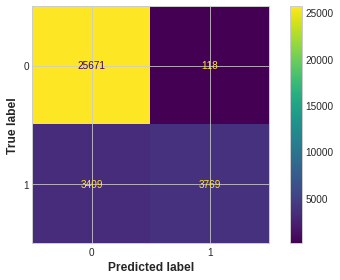

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_l)



For Train Dataset

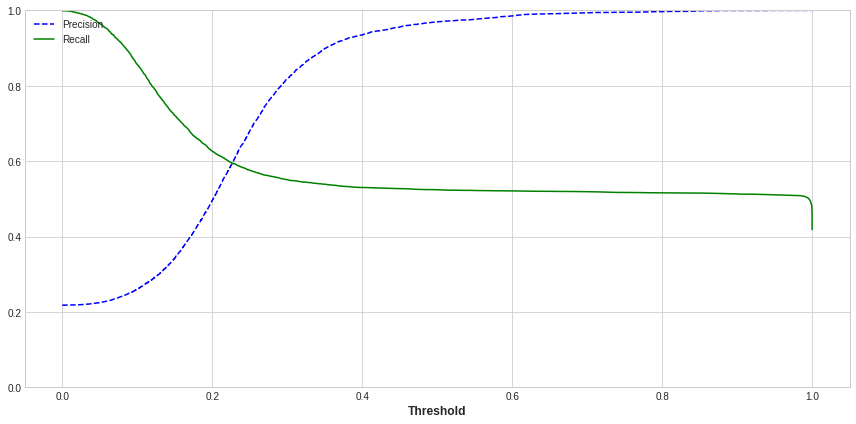

In [ ]:
y_scores_l_t = model.predict_proba(x_train)[:, 1]
precisions_l_t, recalls_l_t, thresholds_l_t = precision_recall_curve(y_train, y_scores_l_t)
precision_recall_vs_threshold_l = plot_precision_recall_vs_threshold(precisions_l_t, recalls_l_t, thresholds_l_t)
plt.savefig('precision_recall_vs_threshold_L_training.jpeg')
plt.show(precision_recall_vs_threshold_l)




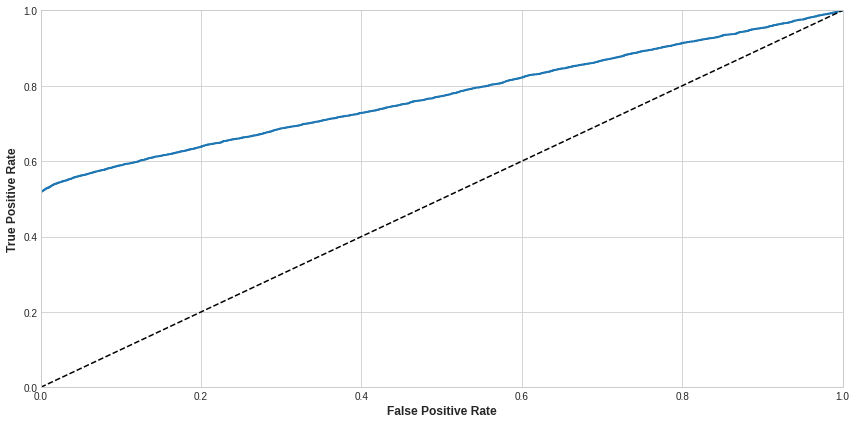

In [ ]:
fpr_l_t, tpr_l_t, thresholds_l_t = roc_curve(y_train, y_scores_l_t)
fpr_tpr_L_training = plot_roc_curve(fpr_l_t, tpr_l_t)
plt.savefig('roc_training.jpeg')
plt.show(fpr_tpr_L_training)


In [ ]:
roc_auc_score(y_train, y_scores_l_t)

0.7734258919997825

For Test-dataset


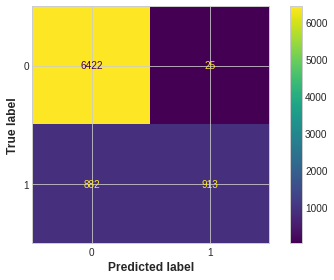

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_l)
plt.savefig('confusion_mat')


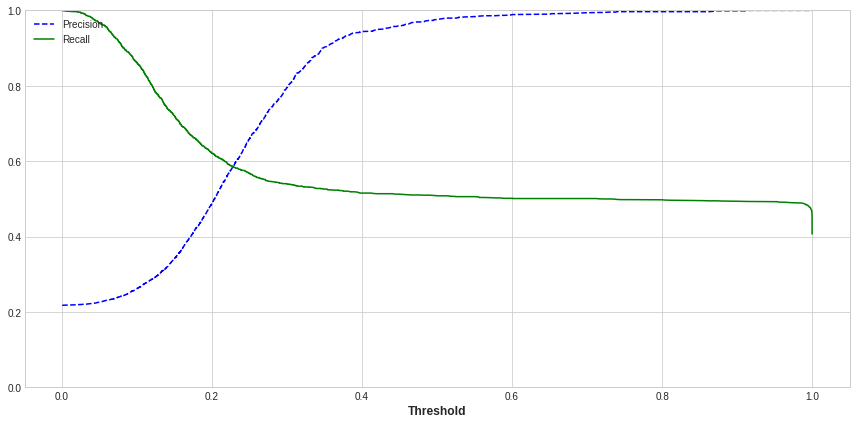

In [ ]:
y_scores_l_test = model.predict_proba(x_test)[:, 1]
precisions_l_test, recalls_l_test, thresholds_l_test = precision_recall_curve(y_test, y_scores_l_test)
precision_recall_vs_threshold_L_test = plot_precision_recall_vs_threshold(precisions_l_test, recalls_l_test, thresholds_l_test)
plt.savefig('precision_recall_vs_threshold_L_test.jpeg')
plt.show()

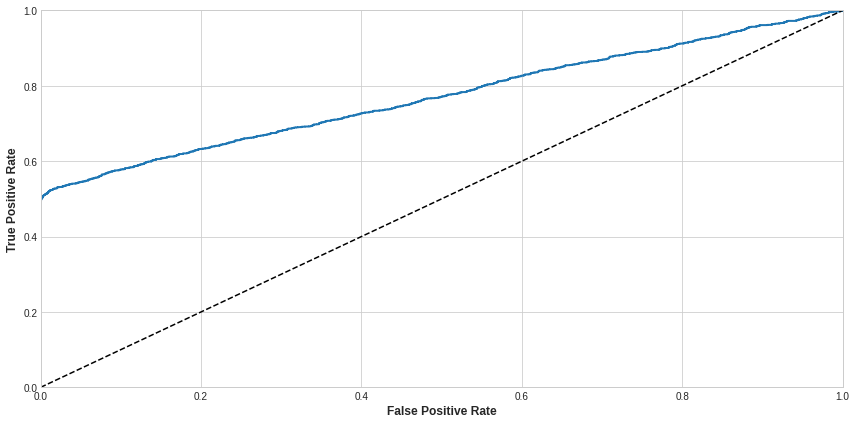

In [ ]:
fpr_l_test, tpr_l_test, thresholds_l_test = roc_curve(y_test, y_scores_l_test)
fpr_tpr_L_test = plot_roc_curve(fpr_l_test, tpr_l_test)
plt.savefig('roc_curve.jpeg')
plt.show(fpr_tpr_L_test)

In [ ]:
roc_auc_score(y_test, y_scores_l_test)

0.7709076753109672

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_test_pred_l)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_test_pred_l)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_test_pred_l)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_test_pred_l)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_test_pred_l)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 50.8635
Precision: 97.3348
F1-Score: 66.813
Accuracy score: 88.9954
AUC Score: 75.2379


**Random_Forest_classifier**

For Train Dataset

In [ ]:
model = RandomForestClassifier(n_estimators=1000,max_depth = 5,criterion='gini', bootstrap=True, random_state=100)
y_train_pred_R = y_train_pred(x_train, y_train, model)
y_test_pred_R = y_train_pred(x_test, y_test, model)


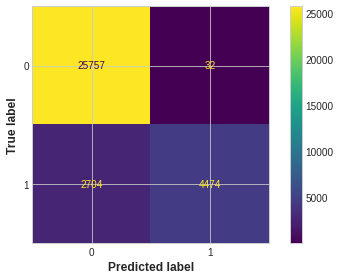

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_R)



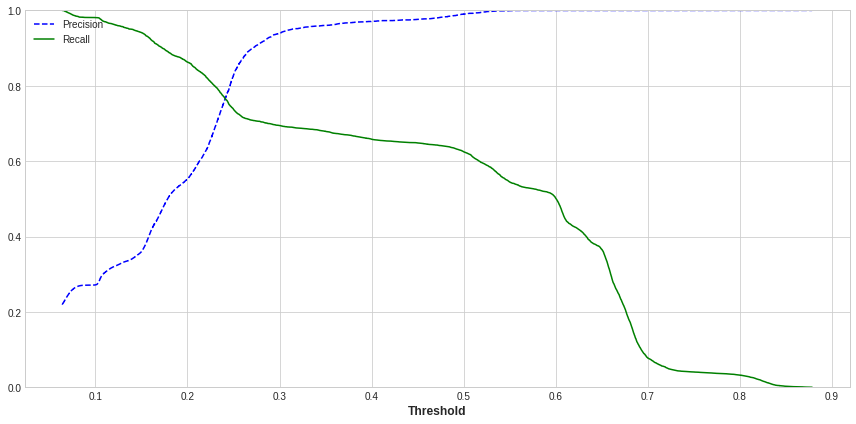

In [ ]:
y_scores_R_t = model.predict_proba(x_train)[:, 1]
precisions_R_t, recalls_R_t, thresholds_R_t = precision_recall_curve(y_train, y_scores_R_t)
plot_precision_recall_vs_threshold(precisions_R_t, recalls_R_t, thresholds_R_t)
plt.savefig('precison_recall_vs_threshold_R_train.jpeg')
plt.show()

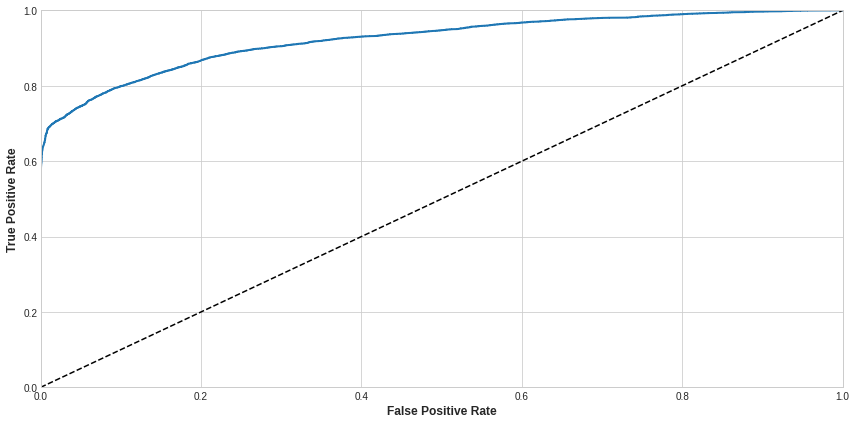

In [ ]:
fpr_R_t, tpr_R_t, thresholds_R_t = roc_curve(y_train, y_scores_R_t)
plot_roc_curve(fpr_R_t, tpr_R_t)
plt.savefig('roc_curve_R_train.jpeg')
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores_R_t)

0.9230633235159659

For Test Dataset

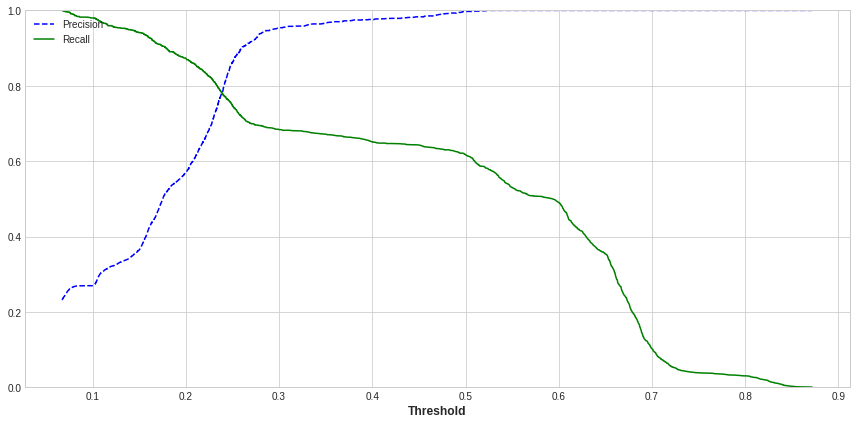

In [ ]:
y_scores_R_test = model.predict_proba(x_test)[:, 1]
precisions_R_test, recalls_R_test, thresholds_R_test = precision_recall_curve(y_test, y_scores_R_test)
plot_precision_recall_vs_threshold(precisions_R_test, recalls_R_test, thresholds_R_test)
plt.savefig('precison_recall_vs_threshold_R_test.jpeg')

plt.show()

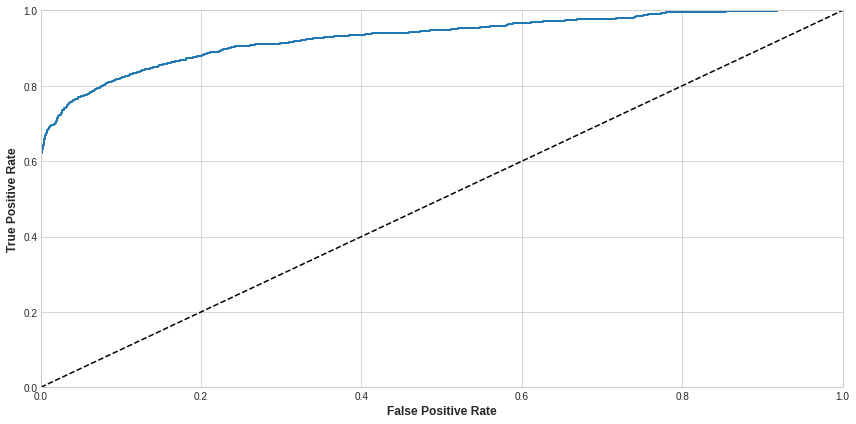

In [ ]:
fpr_R_test, tpr_R_test, thresholds_R_test = roc_curve(y_test, y_scores_R_test)
plot_roc_curve(fpr_R_test, tpr_R_test)
plt.savefig('roc_curve_R_test.jpeg')

plt.show()

In [ ]:
roc_auc_score(y_test, y_scores_R_test)

0.9292911172435367

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_test_pred_R)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_test_pred_R)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_test_pred_R)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_test_pred_R)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_test_pred_R)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 61.0585
Precision: 99.0063
F1-Score: 75.5341
Accuracy score: 91.3856
AUC Score: 80.4439


**Random Forest Classifier With SMOTE**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000,max_depth = 5,criterion='gini', bootstrap=True, random_state=100)
smote_sampler = RandomOverSampler(random_state=42)
model = make_pipeline(smote_sampler,rf_clf)

In [ ]:
y_train_pred_R_S = y_train_pred(x_train, y_train, model)
y_test_pred_R_S = y_train_pred(x_test, y_test, model)


For Train Dataset

In [ ]:
conf_mat_R_S = confusion_matrix(y_train, y_train_pred_R_S)

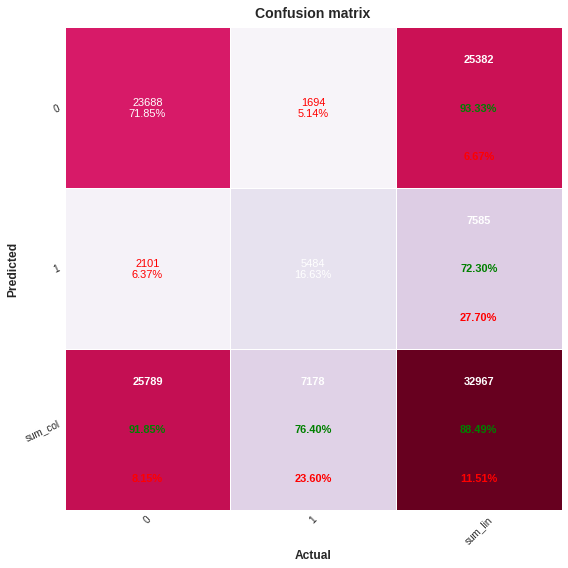

In [ ]:
Confusion_matrix_plot(conf_mat_R_S)

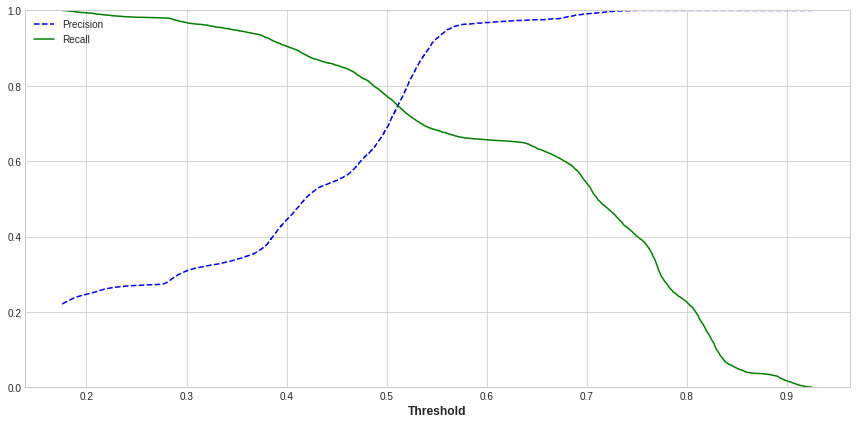

In [ ]:
y_scores_R_S_t = model.predict_proba(x_train)[:, 1]
precisions_R_S_t, recalls_R_S_t, thresholds_R_S_t = precision_recall_curve(y_train, y_scores_R_S_t)
plot_precision_recall_vs_threshold(precisions_R_S_t, recalls_R_S_t, thresholds_R_S_t)
plt.show()

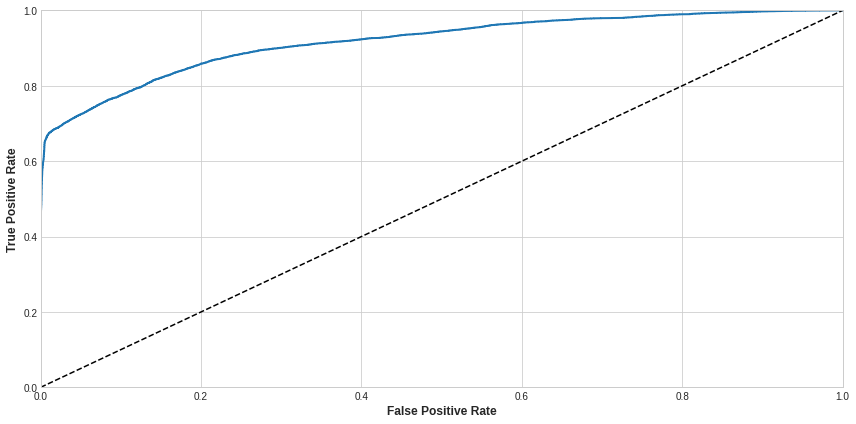

In [ ]:
fpr_R_S_t, tpr_R_S_t, thresholds_R_S_t = roc_curve(y_train, y_scores_R_S_t)
plot_roc_curve(fpr_R_S_t, tpr_R_S_t)
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores_R_S_t)

0.9172694817051698

For Test Dataset

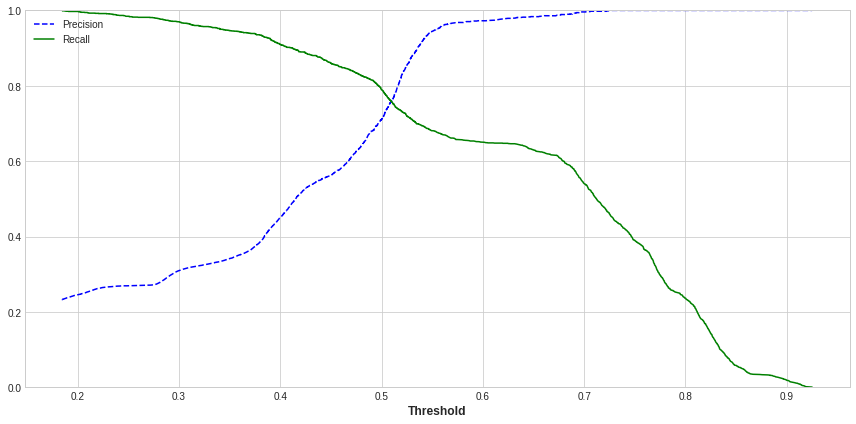

In [ ]:
y_scores_R_S_test = model.predict_proba(x_test)[:, 1]
precisions_R_S_test, recalls_R_S_test, thresholds_R_S_test = precision_recall_curve(y_test, y_scores_R_S_test)
plot_precision_recall_vs_threshold(precisions_R_S_test, recalls_R_S_test, thresholds_R_S_test)
plt.show()

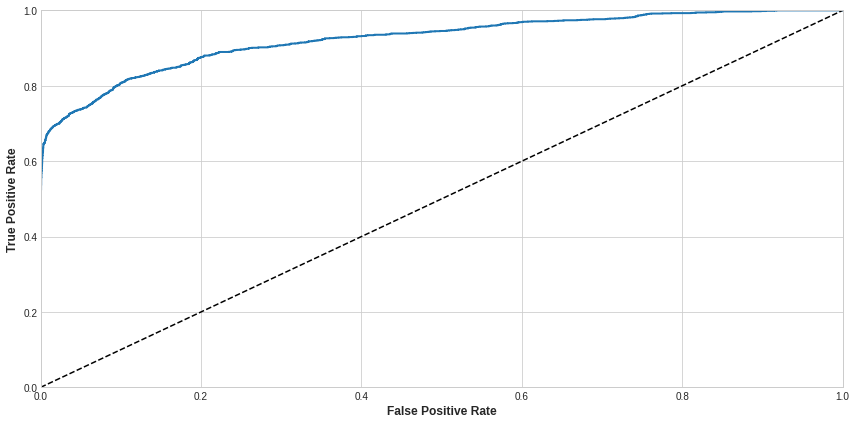

In [ ]:
fpr_R_S_test, tpr_R_S_test, thresholds_R_S_test = roc_curve(y_test, y_scores_R_S_test)
plot_roc_curve(fpr_R_S_test, tpr_R_S_test)
plt.show()

In [ ]:
roc_auc_score(y_test, y_scores_R_S_test)

0.9239769917385081

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_test_pred_R_S)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_test_pred_R_S)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_test_pred_R_S)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_test_pred_R_S)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_test_pred_R_S)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 75.0418
Precision: 69.7205
F1-Score: 72.2833
Accuracy score: 87.4666
AUC Score: 82.9839


**Model Fine Tunning**

In [ ]:
estimators = all_estimators(type_filter='classifier')

all_clfs = []
for name, ClassifierClass in estimators:
    print('Appending', name)
    try:
        clf = ClassifierClass()
        all_clfs.append(clf)
    except Exception as e:
        print('Unable to import', name)
        print(e)

Appending AdaBoostClassifier
Appending BaggingClassifier
Appending BernoulliNB
Appending CalibratedClassifierCV
Appending CategoricalNB
Appending ClassifierChain
Unable to import ClassifierChain
__init__() missing 1 required positional argument: 'base_estimator'
Appending ComplementNB
Appending DecisionTreeClassifier
Appending DummyClassifier
Appending ExtraTreeClassifier
Appending ExtraTreesClassifier
Appending GaussianNB
Appending GaussianProcessClassifier
Appending GradientBoostingClassifier
Appending HistGradientBoostingClassifier
Appending KNeighborsClassifier
Appending LabelPropagation
Appending LabelSpreading
Appending LinearDiscriminantAnalysis
Appending LinearSVC
Appending LogisticRegression
Appending LogisticRegressionCV
Appending MLPClassifier
Appending MultiOutputClassifier
Unable to import MultiOutputClassifier
__init__() missing 1 required positional argument: 'estimator'
Appending MultinomialNB
Appending NearestCentroid
Appending NuSVC
Appending OneVsOneClassifier
Unable

In [ ]:
classifier_model = [('Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
          # ('Linear SVM', SVC(C=0.025, kernel='linear')),
          # ('RBF SVM', SVC(C=1, gamma=2)),
          # ('Gaussian Process',
          #   GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))),
          ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest',
            RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)),
          ('Neural Net', MLPClassifier(alpha=1, max_iter=1000)),
          ('AdaBoost', AdaBoostClassifier()),
          ('Naive Bayes', GaussianNB()),
          # ('QDA', QuadraticDiscriminantAnalysis())
          ]

In [ ]:
basic_model_selection(x_train,y_train,10,classifier_model)

Nearest Neighbors
accuracy  :  0.7471412946014471
precision  :  0.3384021314123369
recall  :  0.169545226745609
40.72390818595886
Decision Tree
accuracy  :  0.9244093630278776
precision  :  0.9584988676866285
recall  :  0.6823652016487765
4.794109582901001
Random Forest
accuracy  :  0.7822671242759672
precision  :  0.2
recall  :  0.0
241.27705550193787
Neural Net
accuracy  :  0.7368919431757615
precision  :  0.8825929755336549
recall  :  0.6145097376487454
477.89566111564636
AdaBoost
accuracy  :  0.9231051286694877
precision  :  0.9376260209493473
recall  :  0.6929536563287918
73.54743885993958
Naive Bayes
accuracy  :  0.8921047211940246
precision  :  0.9460974666365972
recall  :  0.5348338985948105
1.7687819004058838


**Save Results For further analysis by ML Foundary**

In [ ]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        cv = cross_folds,
                        n_jobs = 5,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    metric_dict = {"Precision Score":precision_score,
                "Recall Score":recall_score,
                "F1 Score":f1_score,
                "Accuracy Score":accuracy_score,
                "RocAuc score":roc_auc_score}
    
    result_dict = {}
    for metric_key,metric in metric_dict.items():
        print(f"{metric_key}: { round(metric(y, y_predicted)*100, 4) }")
        result_dict[metric_key] = round(metric(y, y_predicted)*100, 4)
    
    return model_grid, result_dict 

In [ ]:
random_grid = {'n_estimators': [ 10, 20],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [1, 2, 3],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'bootstrap': [True, False]}

In [ ]:
#mlf_run = mlf_api.create_run(project_name='Loan_Default_Metrics', run_name='Random-Forest-Tunned') 

In [ ]:
#rf_clf1 = RandomForestClassifier()

In [ ]:
#model_grid, result_dict = model_parameter_tuning(x_train,y_train,rf_clf1,random_grid,4)

In [ ]:
#result_dict

In [ ]:
#mlf_run.log_params(model_grid.best_params_)
mlf_run.log_metrics(result_dict)


In [ ]:
#mlf_run.log_model(name="my-sklearn-model",
   # model=model_grid.best_estimator_,
    #framework="sklearn")

In [ ]:
#train_df = x_train.copy()
#train_df['targets'] = y_train
#train_df['predictions'] = model_grid.predict(x_train)

#mlf_run.log_dataset(
    #dataset_name = 'train_dataset',
    #features = train_df[list(x_train.columns)],
    #predictions = train_df['predictions'],
    #actuals = train_df['targets'],
    #only_stats = False,   
#)